### Description of columns:

- **id**: unique identifier for each individual
- **age**: age of the individual in 5-years gap
- **height(cm)**: height of the individual in centimeters
- **weight(kg)**: weight of the individual in kilograms
- **waist(cm)**: waist circumference of the individual in centimeters
- **eyesight(left)**: eyesight measurement for the left eye
- **eyesight(right)**: eyesight measurement for the right eye
- **hearing(left)**: hearing ability measurement for the left ear
- **hearing(right)**: hearing ability measurement for the right ear
- **systolic**: systolic blood pressure
- **relaxation**: relaxation blood pressure
- **fasting blood sugar**: level of blood sugar after fasting
- **Cholesterol**: total cholesterol level in the blood
- **triglyceride**: level of triglycerides in the blood
- **HDL**: good cholesterol level in the blood
- **LDL**: bad cholesterol level in the blood
- **hemoglobin**: hemoglobin level in the blood
- **Urine protein**: protein level in the urine
- **serum creatinine**: level of creatinine in the blood
- **AST**: aspartate aminotransferase level, an enzyme found in the liver and heart
- **ALT**: alanine aminotransferase level, an enzyme found in the liver
- **Gtp**: gamma-glutamyl transferase level, an enzyme related to liver function
- **dental caries**: number of dental caries present
- **smoking**: smoking status of the individual (target)


In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline


In [183]:
warnings.filterwarnings('ignore')

In [184]:
data = pd.read_csv("data/train.csv")

In [185]:
data.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [186]:
data = data.drop(['id'], axis=1)


In [187]:
data_exp = pd.read_csv("data/train_dataset.csv")
data = pd.concat([data, data_exp])

In [188]:
data.shape

(198240, 23)

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198240 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  198240 non-null  int64  
 1   height(cm)           198240 non-null  int64  
 2   weight(kg)           198240 non-null  int64  
 3   waist(cm)            198240 non-null  float64
 4   eyesight(left)       198240 non-null  float64
 5   eyesight(right)      198240 non-null  float64
 6   hearing(left)        198240 non-null  int64  
 7   hearing(right)       198240 non-null  int64  
 8   systolic             198240 non-null  int64  
 9   relaxation           198240 non-null  int64  
 10  fasting blood sugar  198240 non-null  int64  
 11  Cholesterol          198240 non-null  int64  
 12  triglyceride         198240 non-null  int64  
 13  HDL                  198240 non-null  int64  
 14  LDL                  198240 non-null  int64  
 15  hemoglobin           19

In [190]:
data.duplicated().sum()

5517

In [191]:
data =data.drop_duplicates()

In [192]:
data.isnull().values.any()

False

There are no missing values and all columns are numeric

In [193]:
data.nunique()

age                     18
height(cm)              15
weight(kg)              29
waist(cm)              548
eyesight(left)          20
eyesight(right)         18
hearing(left)            2
hearing(right)           2
systolic               128
relaxation              94
fasting blood sugar    259
Cholesterol            279
triglyceride           393
HDL                    123
LDL                    286
hemoglobin             144
Urine protein            6
serum creatinine        34
AST                    196
ALT                    230
Gtp                    444
dental caries            2
smoking                  2
dtype: int64

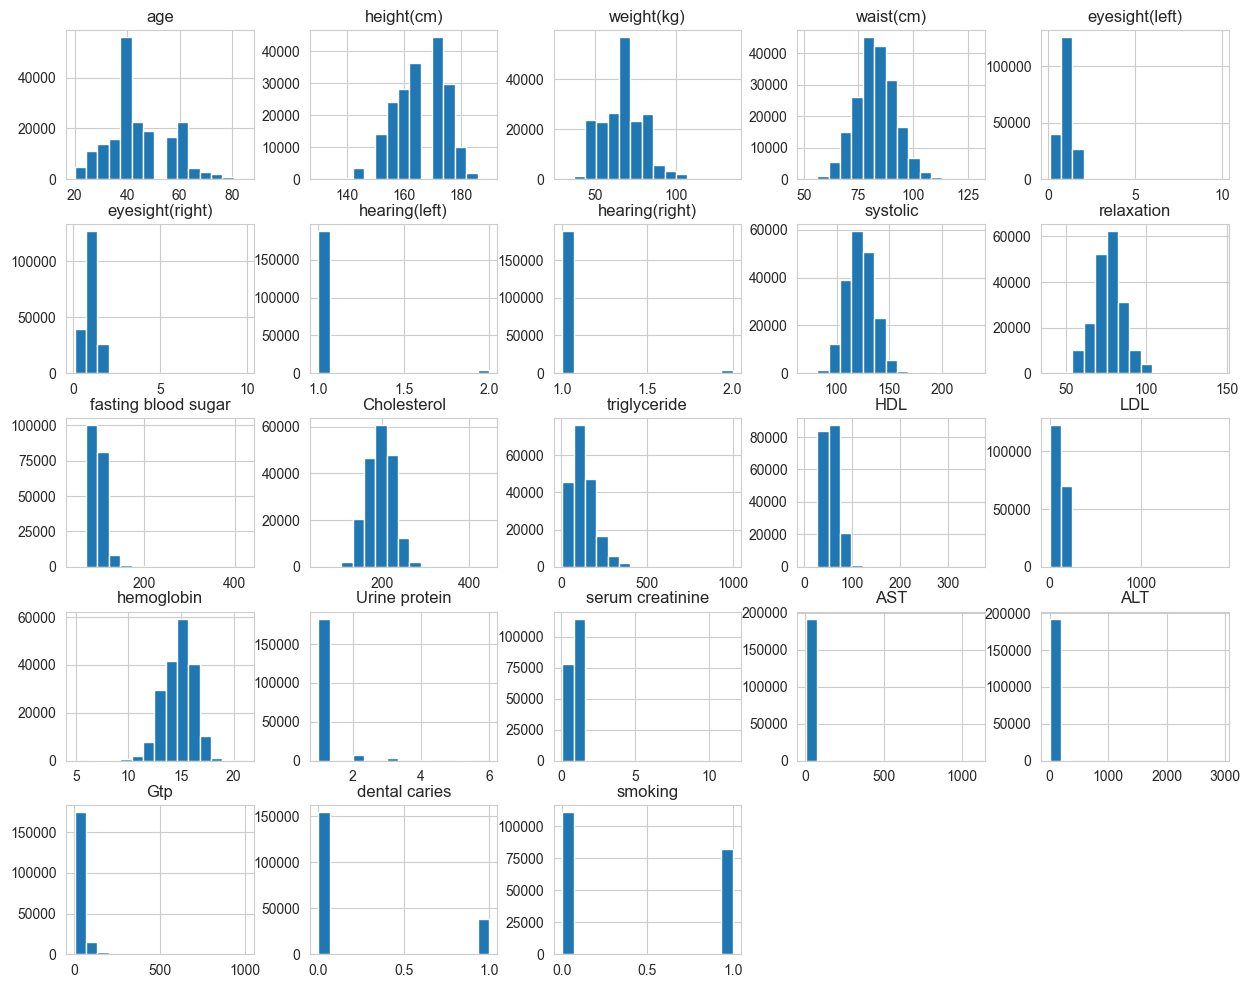

In [176]:
data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

Based on the histograms and the number of unique values, we can observe that the features 'hearing', 'urine protein,' and 'dental caries' are discrete, while the remaining features are continuous. Also 'hearing' and 'dental caries' are already binary and 'urine protein' is ordinal, so no further transformation is needed at this time.

In [177]:
data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,192723.000000,192723.000000,192723.000000,192723.000000,192723.000000,192723.000000,192723.000000,192723.000000,192723.000000,192723.000000,...,192723.000000,192723.000000,192723.000000,192723.000000,192723.000000,192723.000000,192723.000000,192723.000000,192723.000000,192723.000000
mean,44.280112,165.165782,66.932961,82.842144,1.007196,1.002476,1.024216,1.023879,122.329141,76.725342,...,56.096641,114.707430,14.767010,1.076369,0.891671,25.634709,26.652688,36.864842,0.200895,0.425019
std,11.882563,8.888281,12.645668,9.026868,0.419985,0.412585,0.153720,0.152672,12.903359,9.121638,...,14.086282,31.284761,1.456308,0.358072,0.187473,11.628021,20.833482,35.216029,0.400670,0.494347
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,77.000000,0.800000,0.800000,1.000000,1.000000,113.000000,70.000000,...,46.000000,94.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,65.000000,134.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [197]:
data['smoking'].value_counts()

smoking
0    110812
1     81911
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of target')

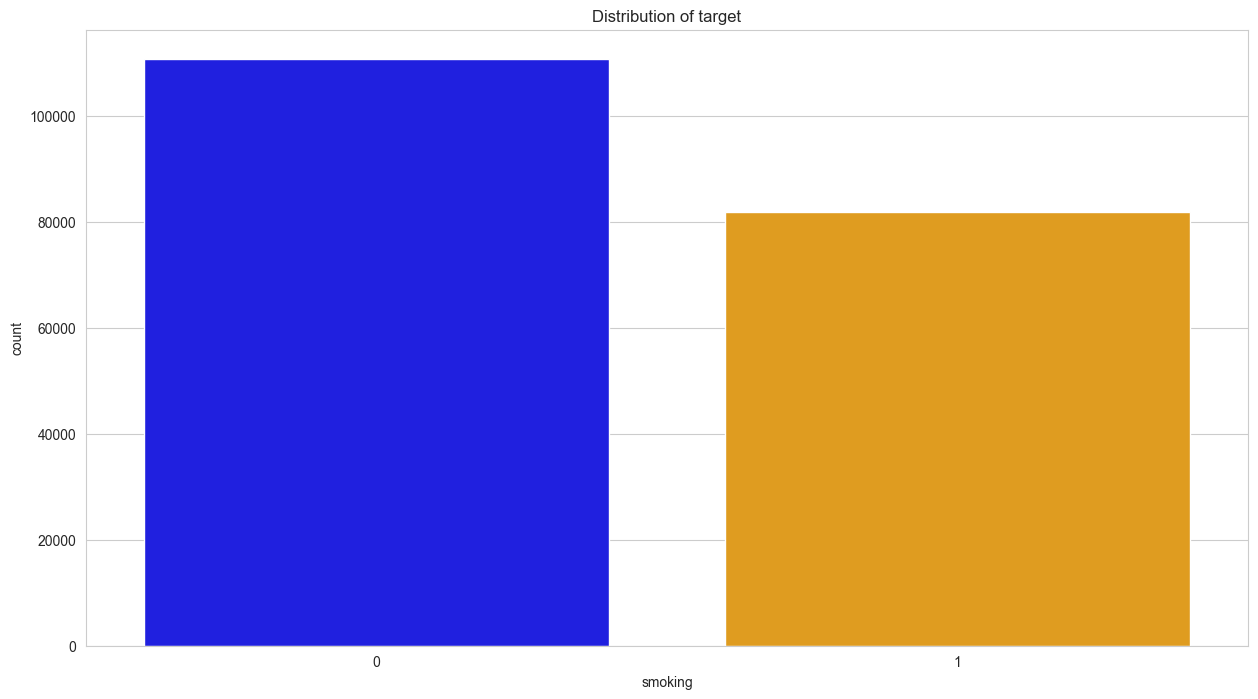

In [196]:
plt.figure(figsize=(15, 8)) 
sns.set_style("whitegrid")
sns.countplot(x = 'smoking', data = data, palette = ['blue', 'orange'])
plt.title('Distribution of target')

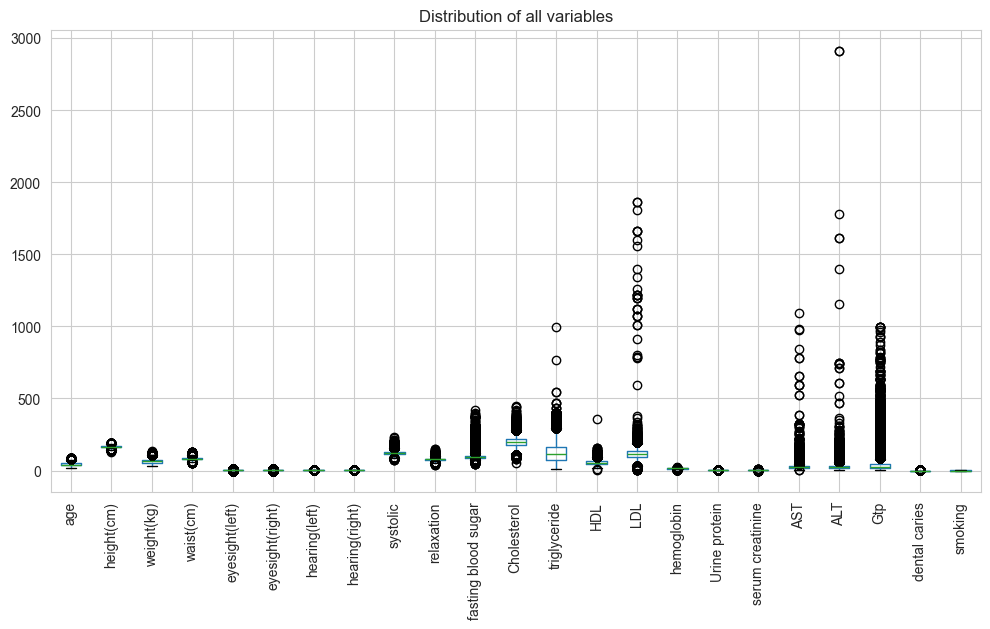

In [179]:
plt.figure(figsize=(12, 6)) 
data.boxplot()
sns.set_style("whitegrid")
plt.title('Distribution of all variables')
plt.xticks(rotation=90)
plt.show()

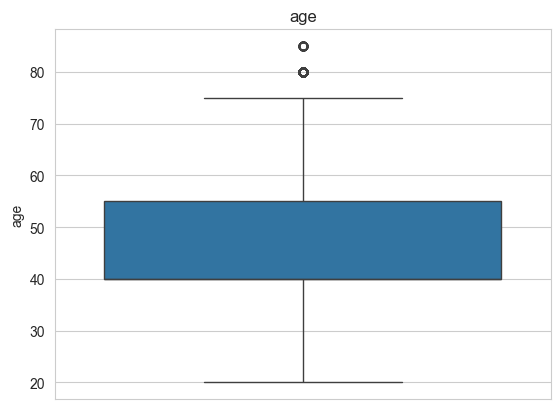

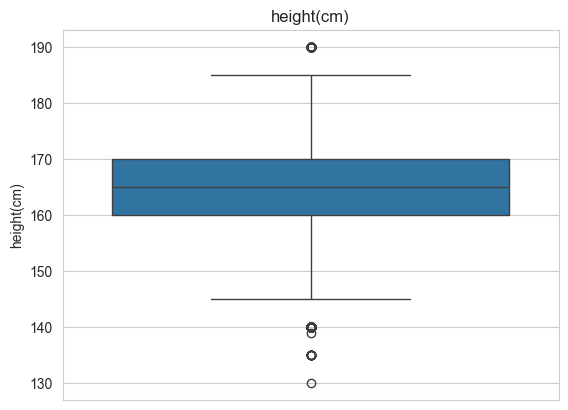

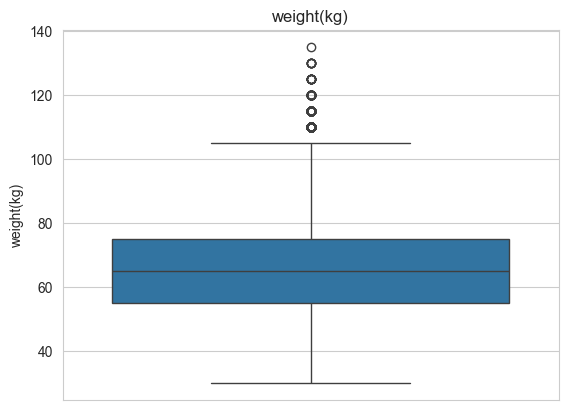

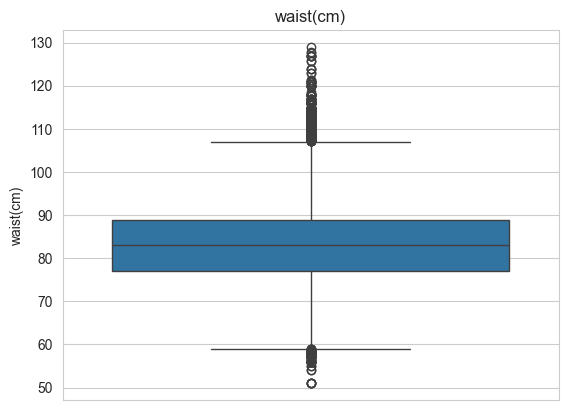

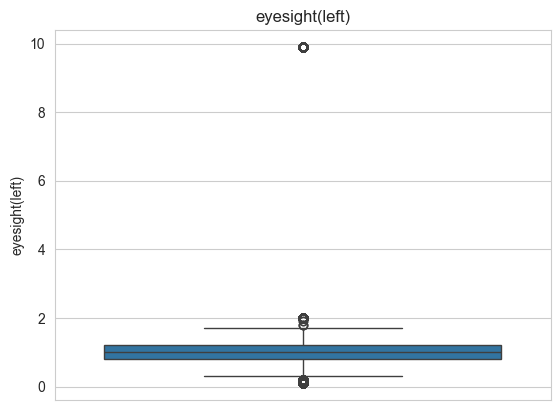

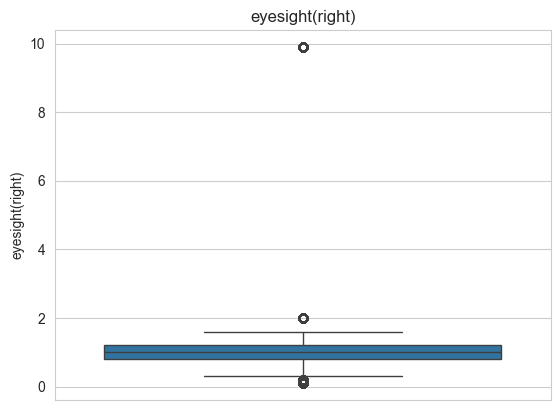

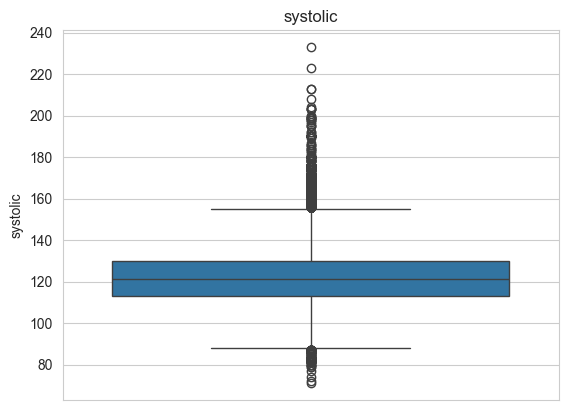

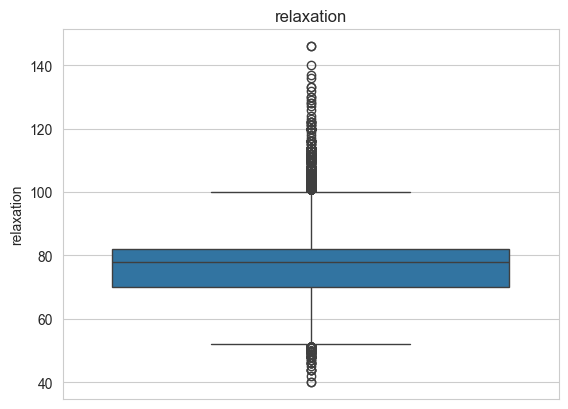

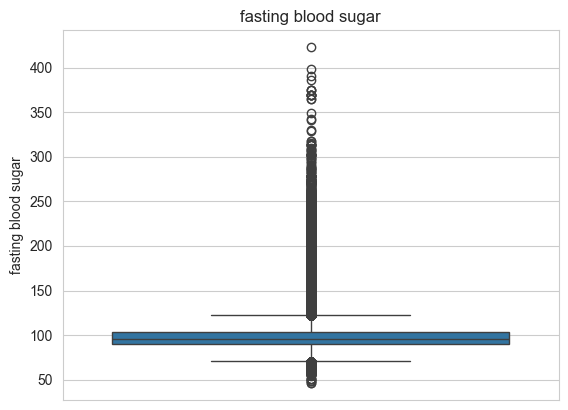

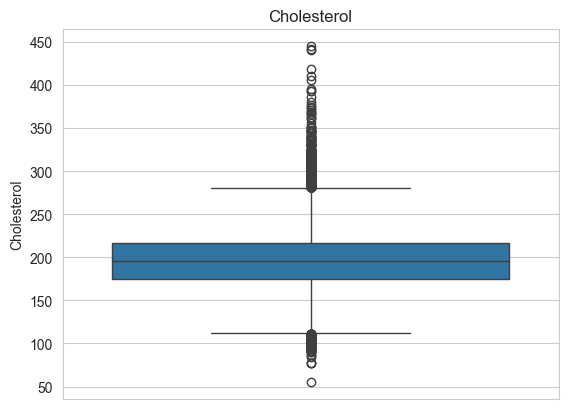

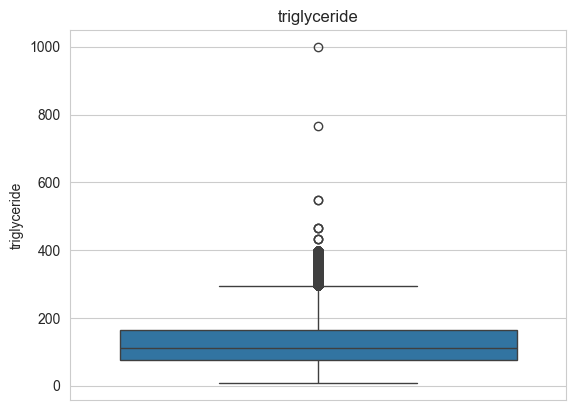

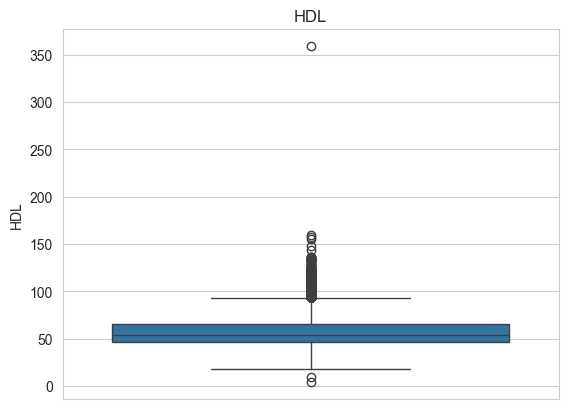

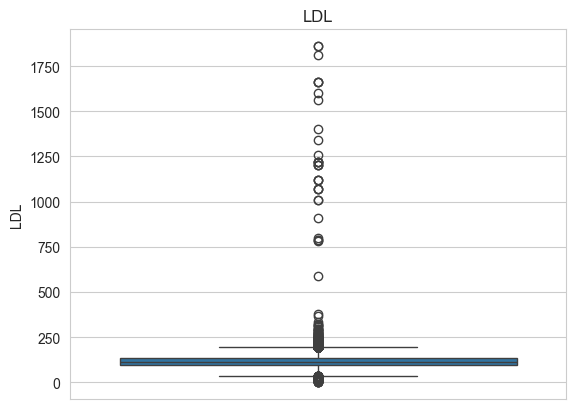

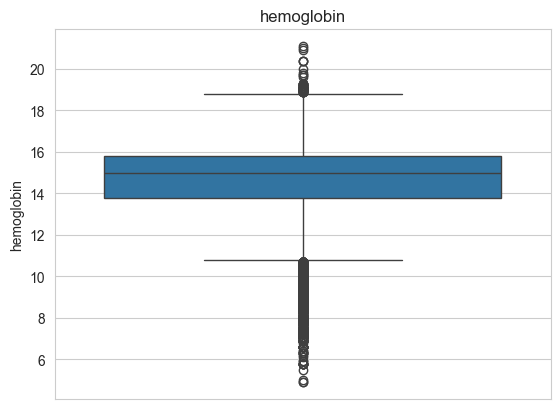

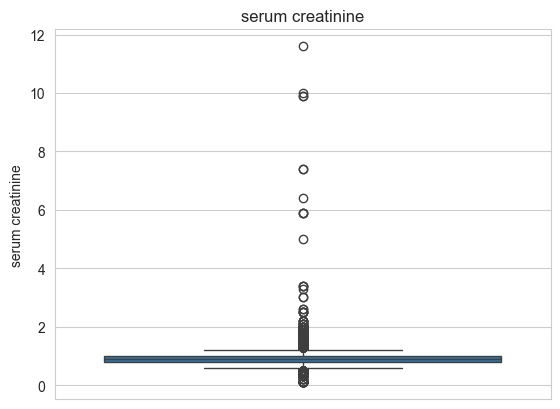

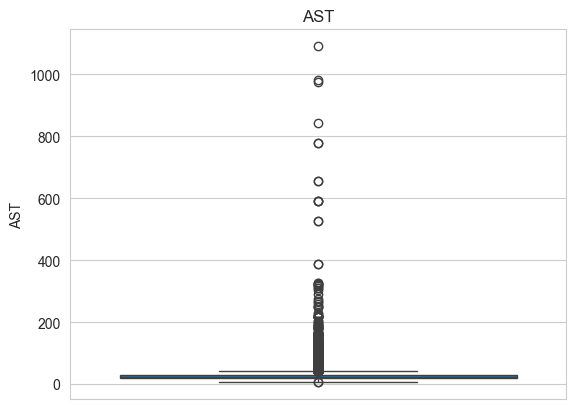

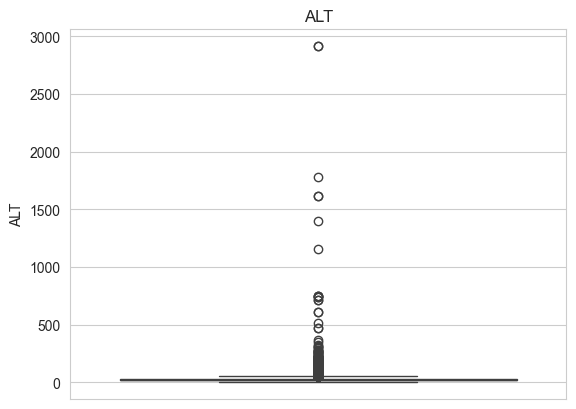

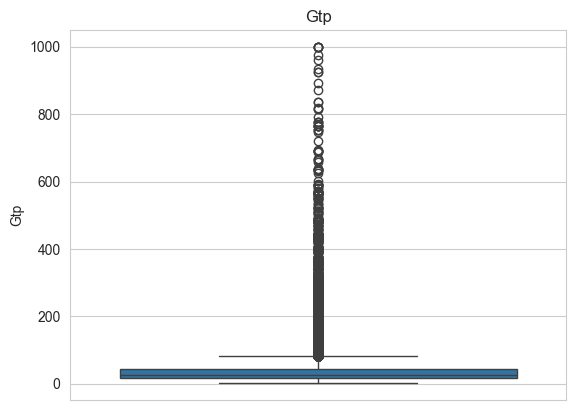

In [202]:
cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin','serum creatinine', 'AST',
       'ALT', 'Gtp']
for column in cols:
    plt.title(column)
    sns.boxplot(data[column])
    plt.show()

It can be seen that there are quite a few outliers, and some of the features are skewed. Therefore, we will need to scale and normalize the data, handle the outliers, or use models that are robust to them, such as most tree-based models.

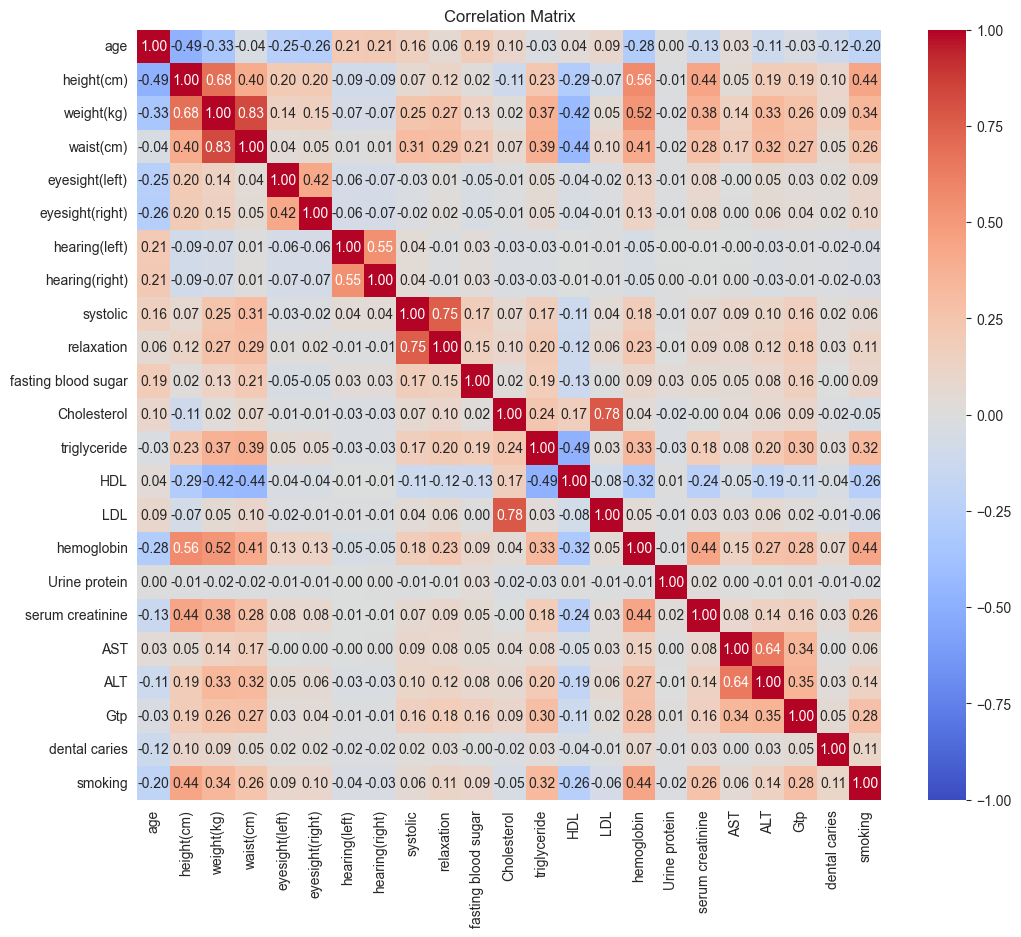

In [194]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap = 'coolwarm', vmin=-1, 
            vmax=1)
plt.title('Correlation Matrix')
plt.show()

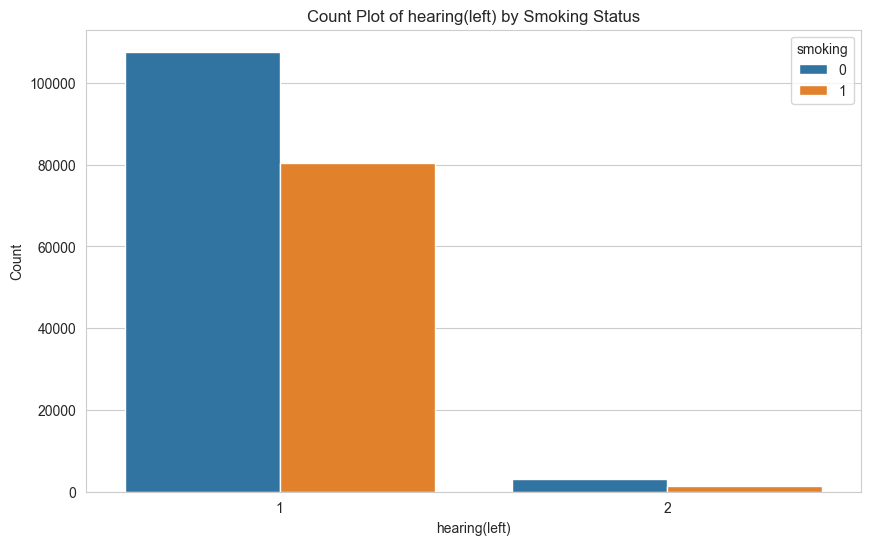

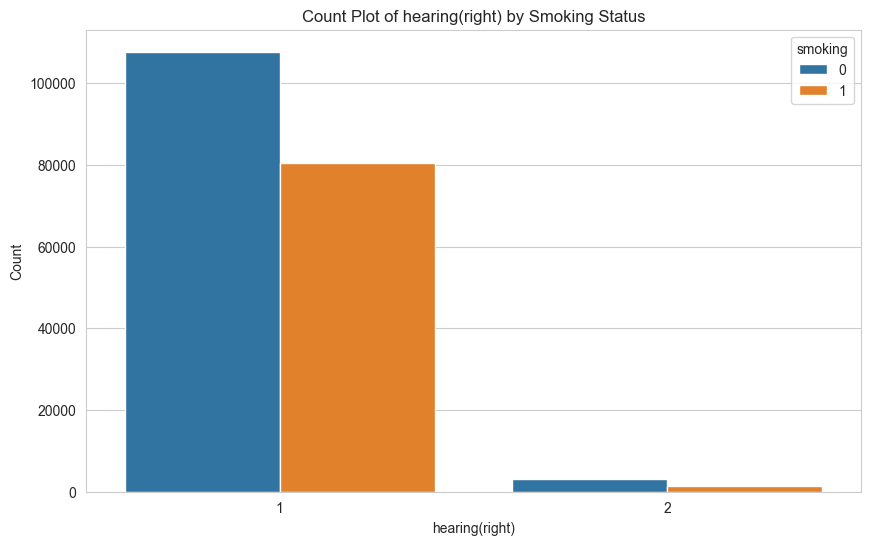

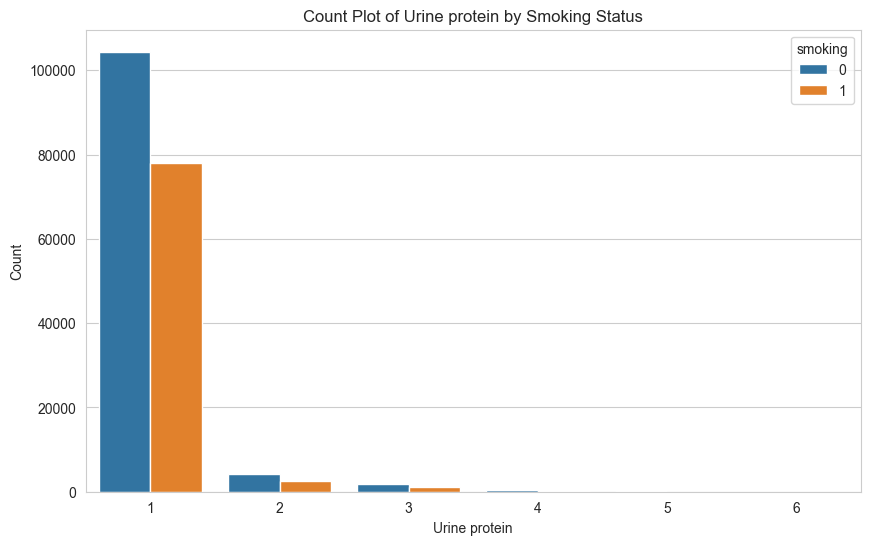

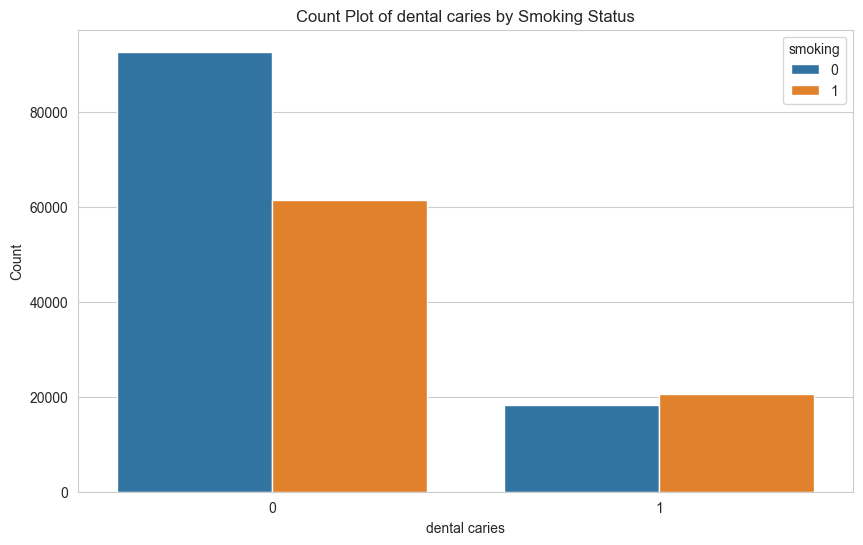

In [201]:
cols = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']

sns.set_style("whitegrid")

for column in cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='smoking', data=data)
    plt.title(f'Count Plot of {column} by Smoking Status')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

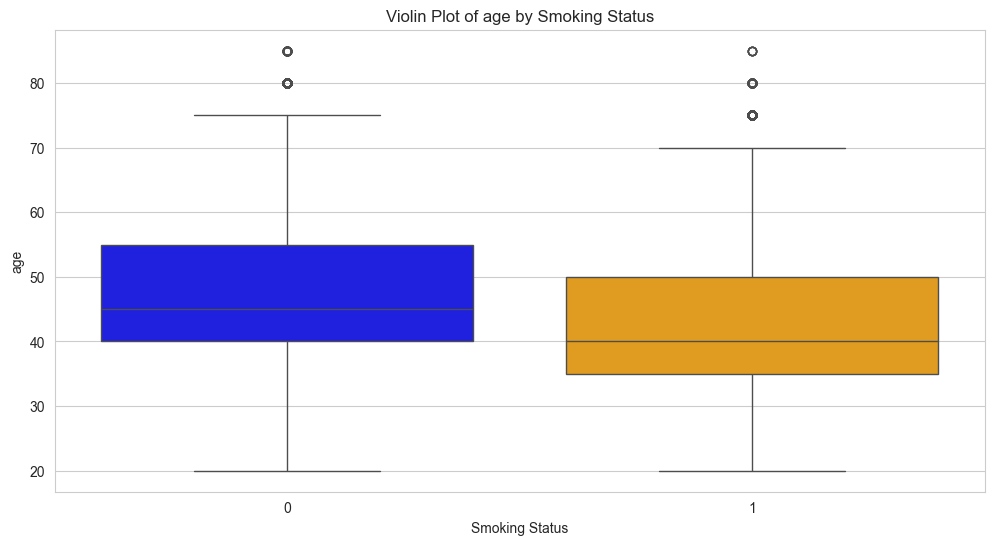

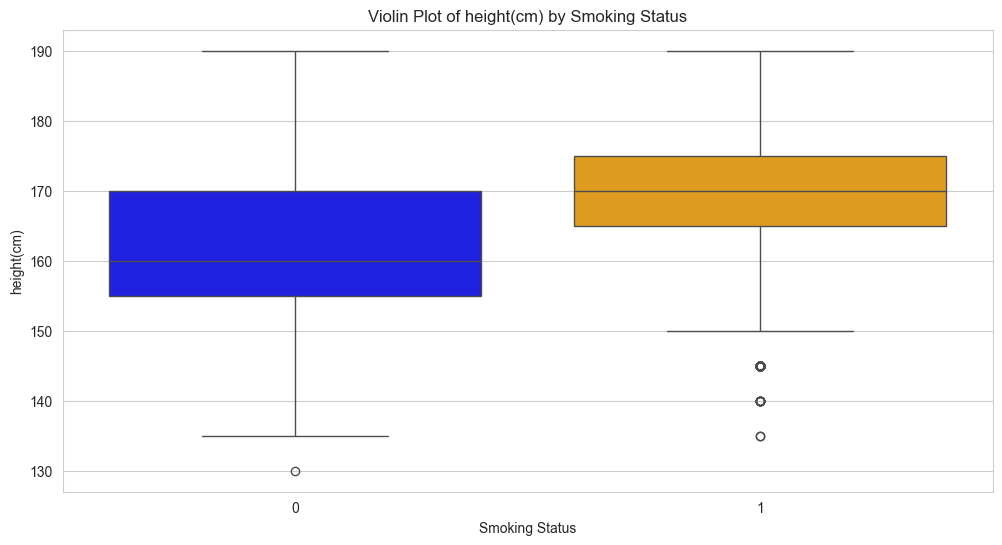

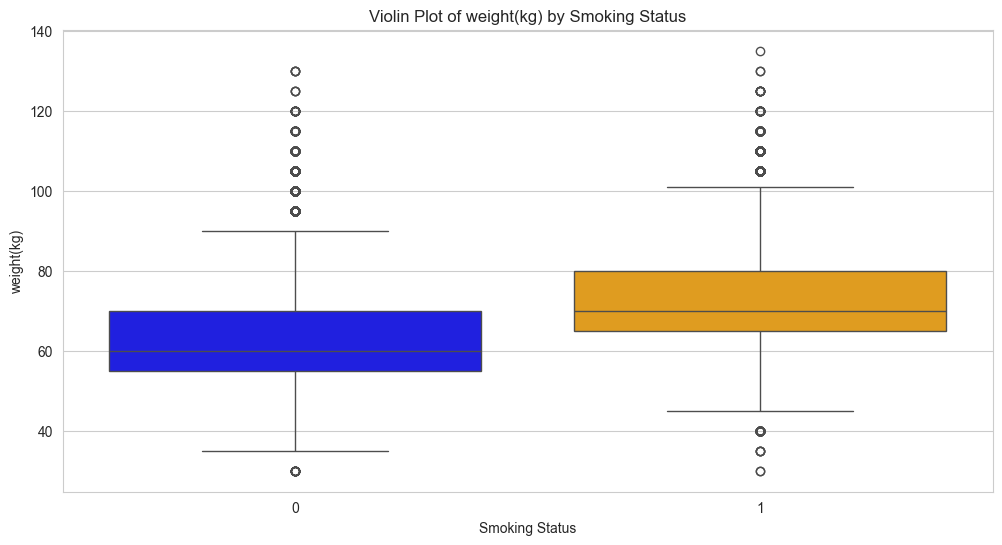

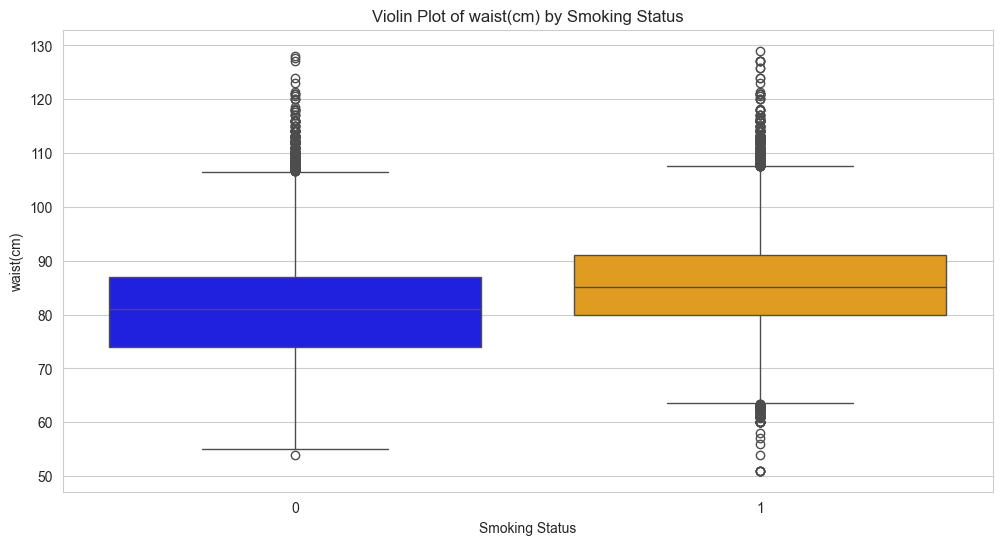

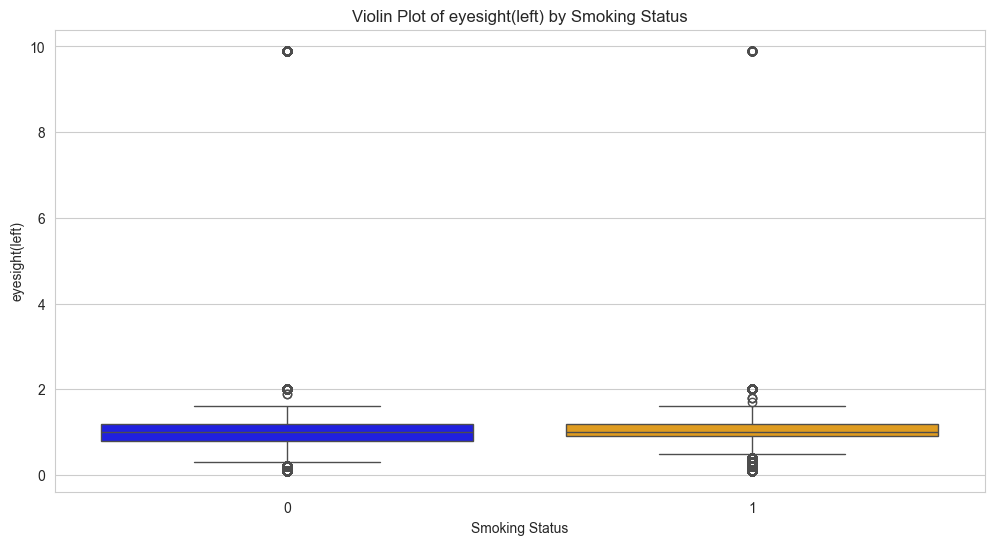

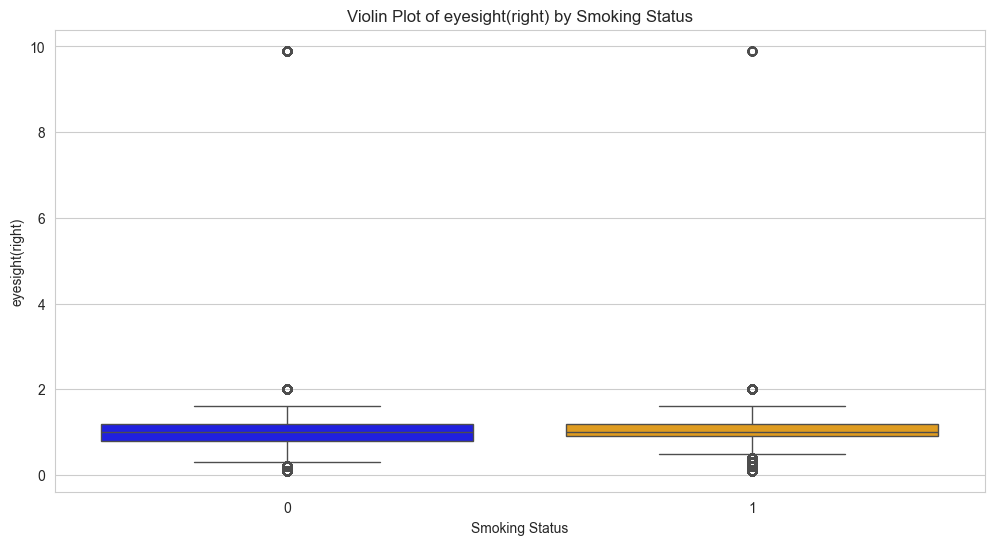

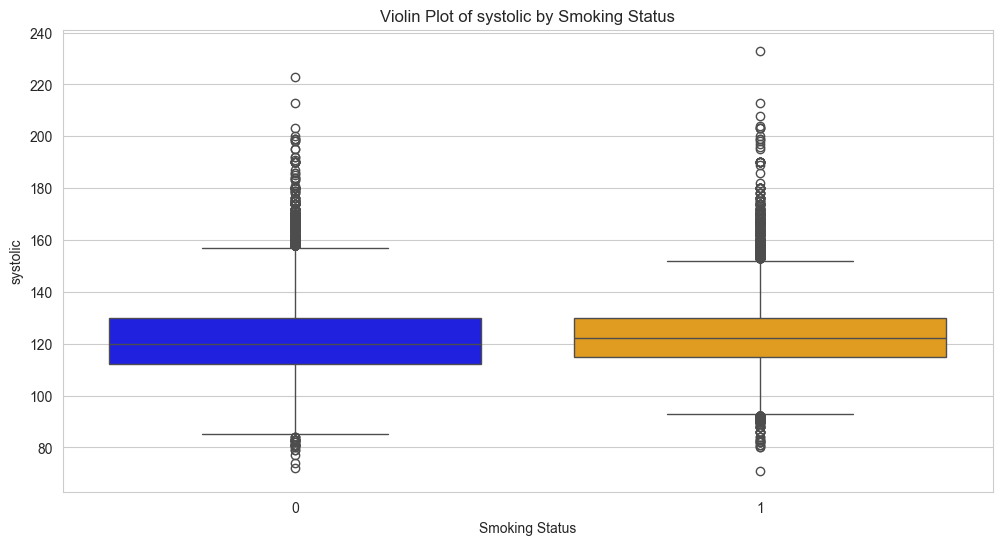

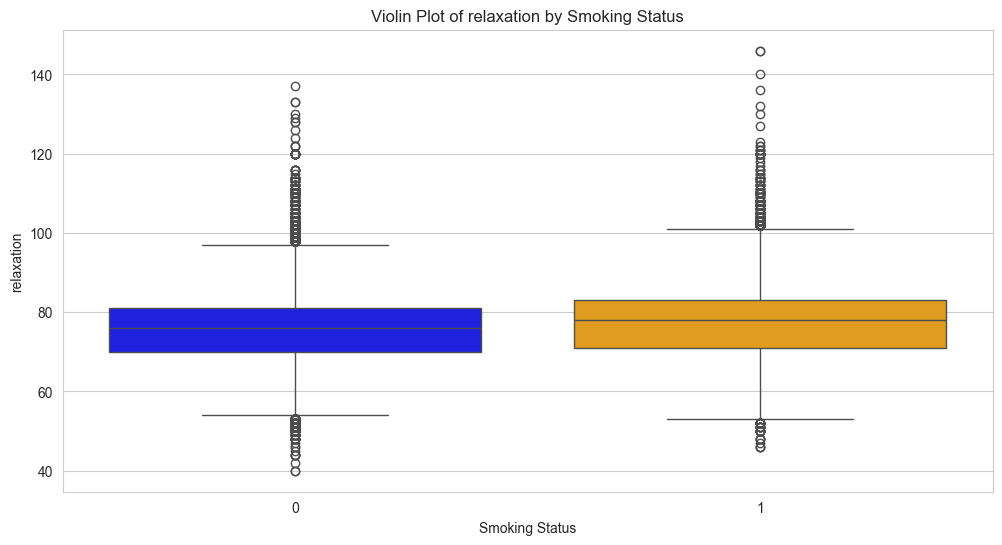

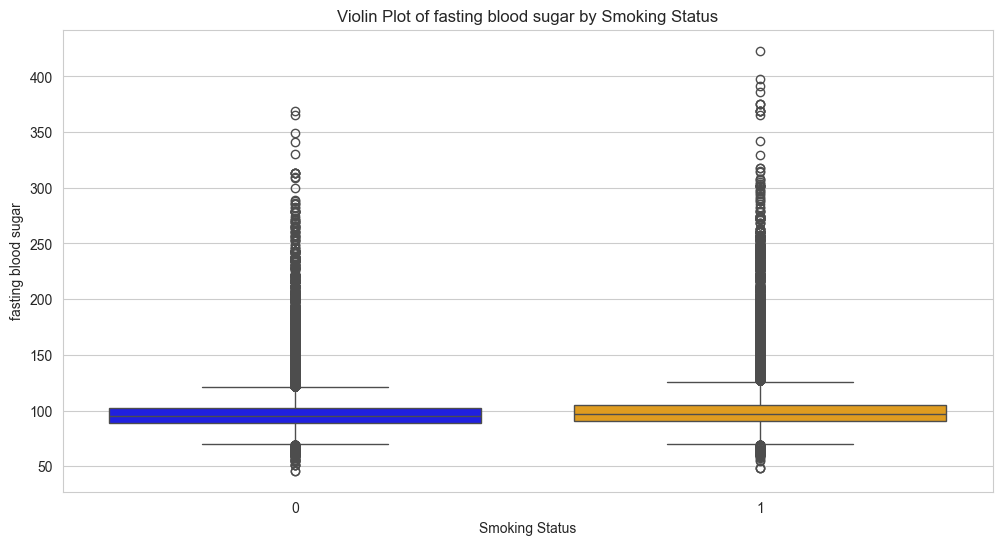

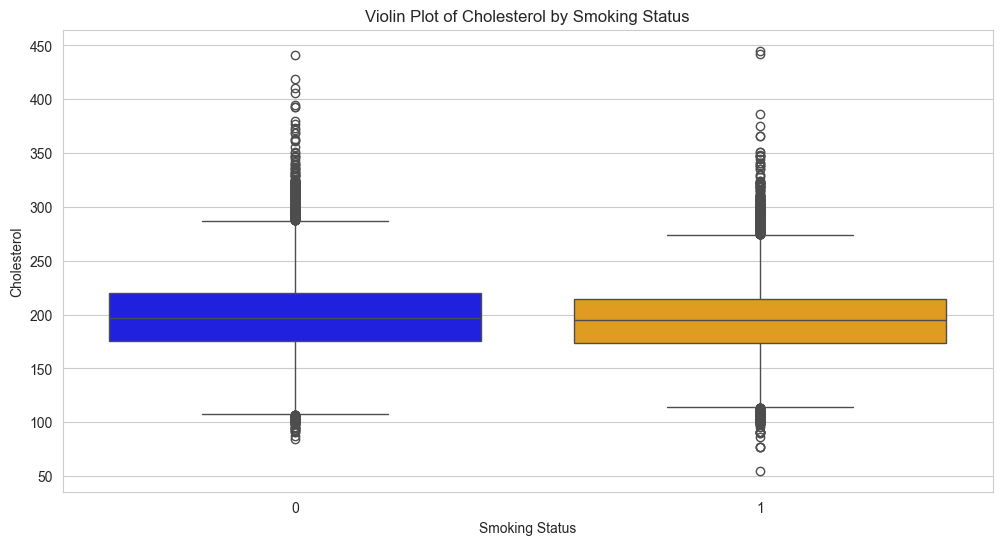

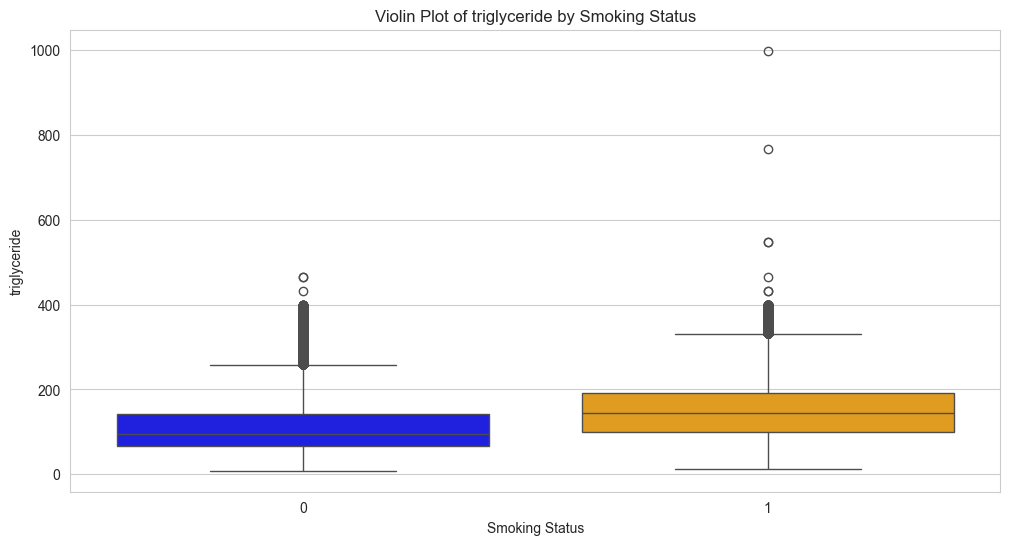

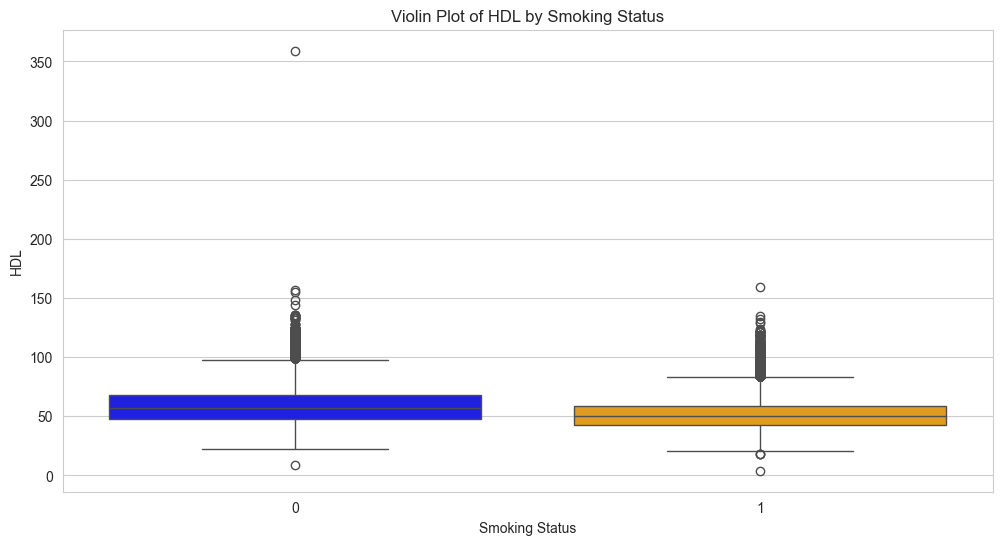

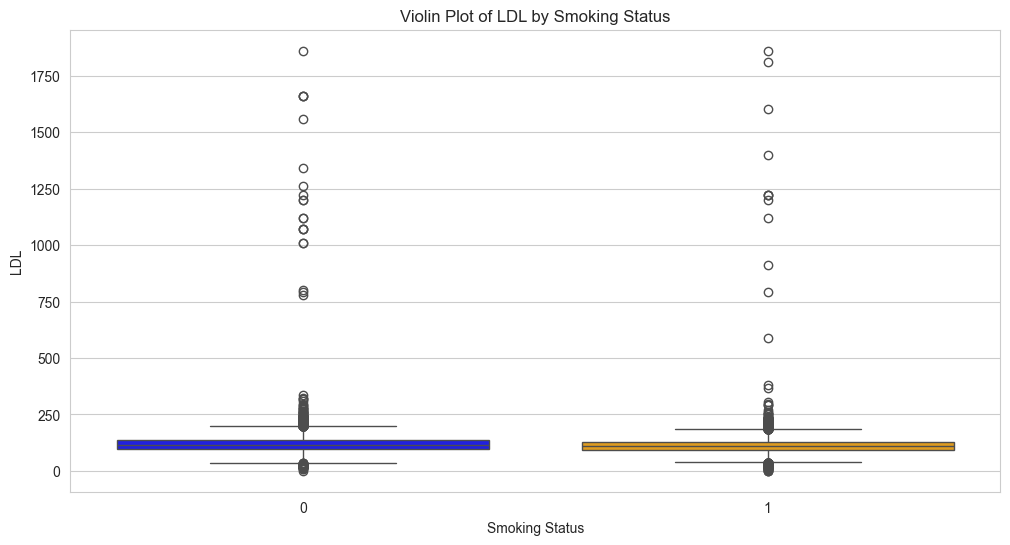

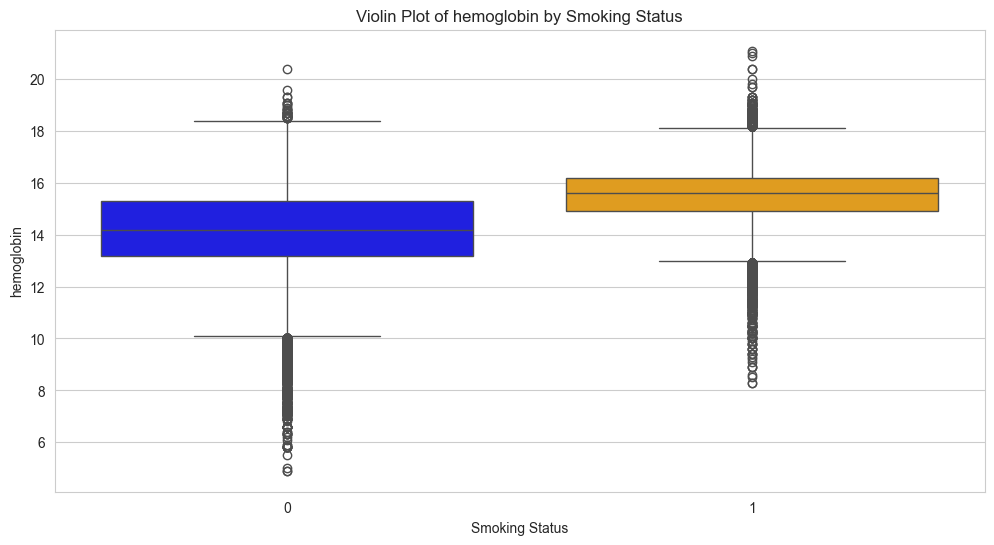

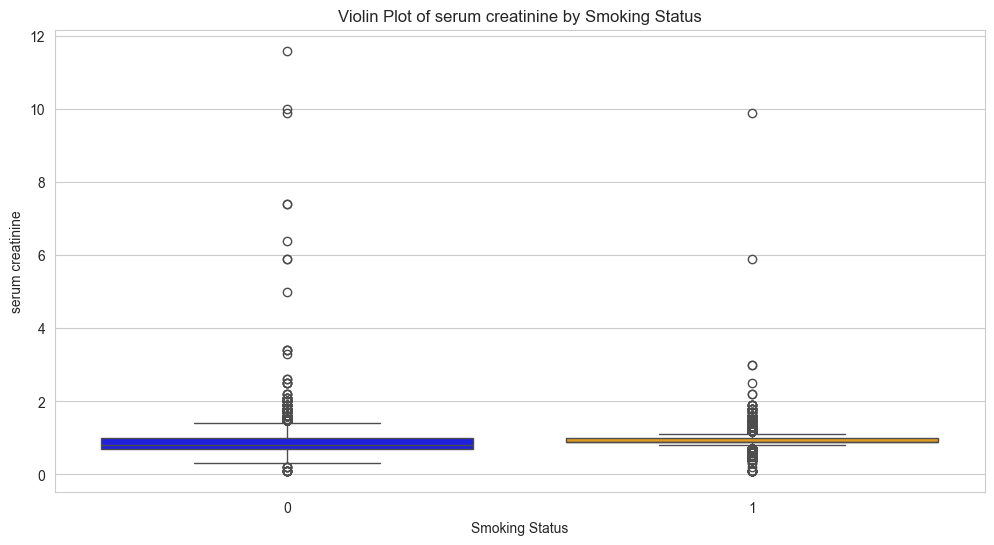

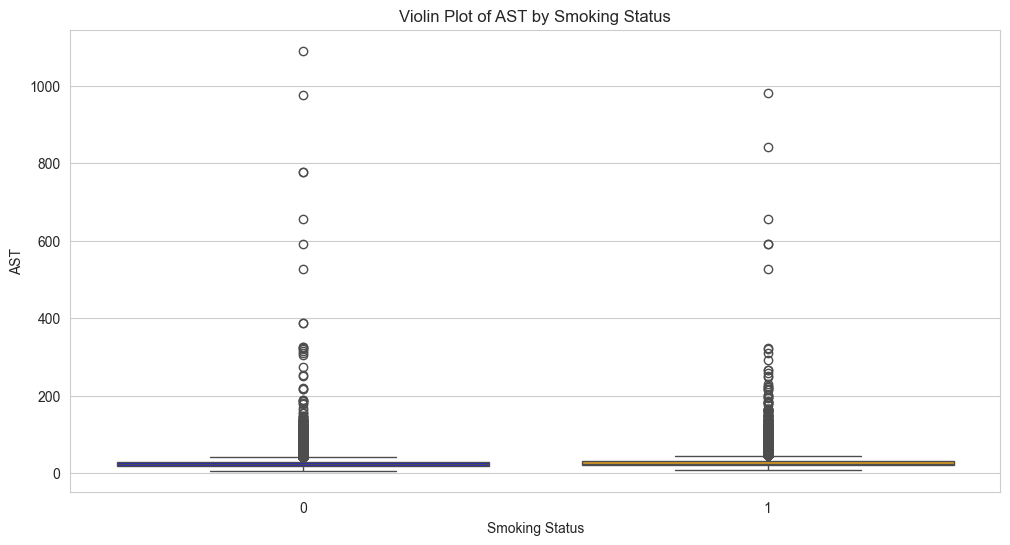

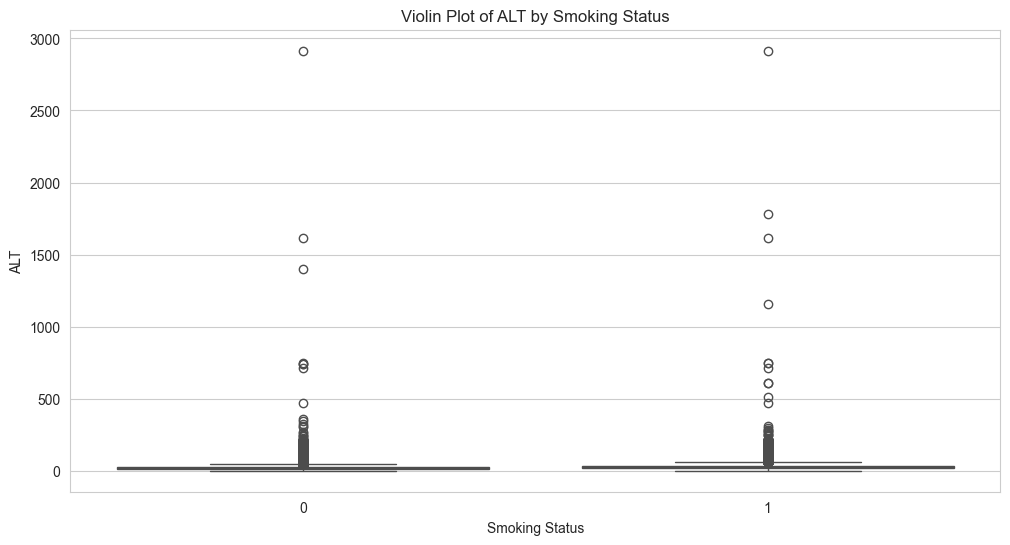

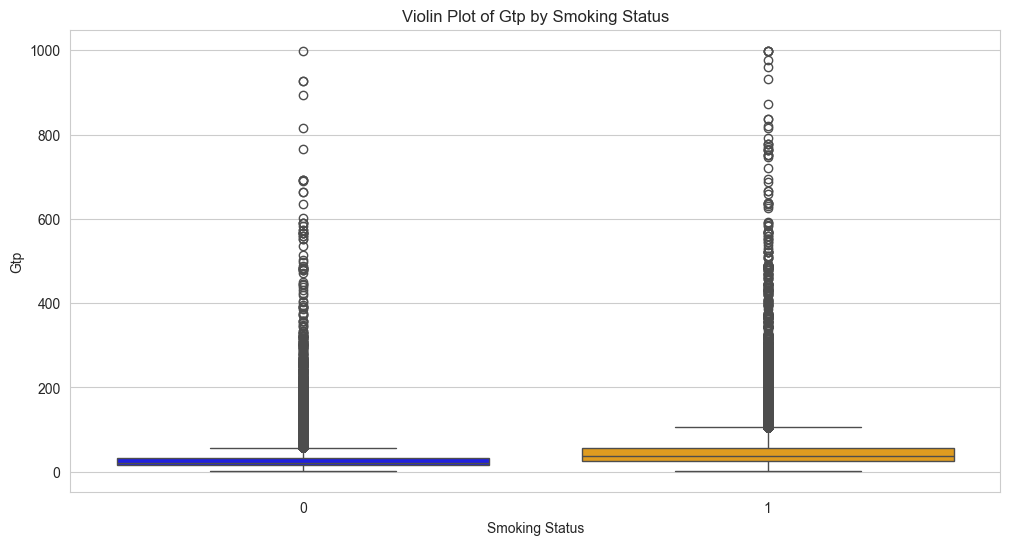

In [206]:
cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
        'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
        'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
        'serum creatinine', 'AST', 'ALT', 'Gtp']


sns.set_style("whitegrid")

for column in cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='smoking', y=column, data=data, palette=['blue', 'orange'])
    plt.title(f'Violin Plot of {column} by Smoking Status')
    plt.xlabel('Smoking Status')
    plt.ylabel(column)
    plt.show()